In [264]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rio
import xarray as xar
# open raster layer
import rasterio
import random
from rasterio.windows import Window
from affine import Affine
from pathlib import Path
import os
from shapely.geometry import Polygon, mapping, MultiPolygon
# from xrspatial import zonal_stats

import pandas as pd
os.chdir('/home/weedsci/matt/SemiF-AnnotationPipeline')
from semif_utils.utils import get_image_meta, read_json

In [273]:
## Load raster using xarray and convert to numpy
dem_path = Path("/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-developed-images/MD_2022-07-20/autosfm/dem/dem.tif")
# dem_path = Path("/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-developed-images/MD_2022-07-20/autosfm/dem/dem_clipped_26986.tif")

# Open as rio XarrayDataset
raster_xarr = rio.open_rasterio(dem_path, mask_and_scale=True)
# Close so it doesn't get corrupted
# raster_xarr.close()
print(raster_xarr.rio.crs)
print(raster_xarr.rio.transform()[0])
print(raster_xarr.rio.nodata)
raster_xarr.plot()
# Convert to numpy
raster_np = raster_xarr.to_numpy()
# Mask Nan values
raster_np = np.ma.array(raster_np, mask=np.isnan(raster_np))
# Change format to show in matplotlib
raster_np = raster_np.squeeze()

print(type(raster_np))
print(raster_np.dtype)
print(raster_np.max())  
print(raster_np.min())  
# plt.imshow(raster_np)

LOCAL_CS["Local Coordinates (m)",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
0.0009260933635346703
nan
<class 'numpy.ma.core.MaskedArray'>
float32
1.0674349
-3.553371
Error in callback <function flush_figures at 0x7fd0a3161040> (for post_execute):


KeyboardInterrupt: 

In [191]:
from xrspatial import zonal_stats as xrzonal_stats
zones_arr_out_shape = raster_xarr.shape[1:]
raster_xarr_transform = raster_xarr.rio.transform()
dem_zones_arr = rasterio.features.rasterize(polys, fill = 7, out_shape = zones_arr_out_shape, transform=raster_xarr_transform)

In [192]:
import xarray as xr
dem_shape_zones_xarr = xr.DataArray(dem_zones_arr)
DEM_b1 = raster_xarr.sel(band=1)
xrzonal_stats(dem_shape_zones_xarr, DEM_b1)

,zone,mean,max,min,sum,std,var,count
0,0,-0.150578,0.360707,-0.250712,-4615.380371,0.193813,0.037563,30651.0
1,2,-0.091595,0.269520,-0.251027,-1856.535645,0.129550,0.016783,20269.0
2,3,0.091546,0.500149,-0.239954,13479.763672,0.153738,0.023635,147245.0
3,4,0.034813,0.325718,-0.242231,842.514587,0.123531,0.015260,24201.0
4,5,-0.083793,0.044904,-0.204282,-786.819397,0.098436,0.009690,9390.0
5,6,-0.065701,0.411501,-0.226006,-2087.396729,0.137775,0.018982,31771.0
6,7,-0.149264,0.701159,-1.222589,-380993.718750,0.234925,0.055190,2552488.0
7,8,-0.043742,0.468199,-0.249393,-6955.449707,0.191439,0.036649,159010.0
8,9,-0.034293,0.443739,-0.255627,-3733.892578,0.149942,0.022483,108881.0
9,10,-0.042074,0.532663,-0.261770,-17075.472656,0.166587,0.027751,405846.0


# Using AutoGis [site](https://autogis-site.readthedocs.io/en/latest/notebooks/Raster/zonal-statistics.html)

EPSG:26986
| 0.00, 0.00,-0.03|
| 0.00,-0.00, 1.59|
| 0.00, 0.00, 1.00|
0.0009260645765091249


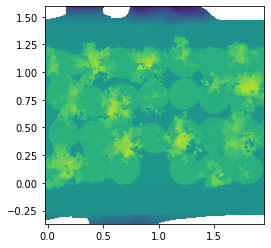

<AxesSubplot:>

In [139]:
from rasterstats import zonal_stats
from rasterio.plot import show
import geopandas as gpd
# File path
dem_path
# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_path,mask_and_scale=True)
# dem = rio.open_rasterio(dem_path, mask_and_scale=True)
print(dem.crs)
print(dem.transform)
print(dem.transform[0])
show(dem)

In [142]:
# polys = MultiPolygon(datas)
# gdf = gpd.GeoDataFrame(crs=raster_xarr.rio.crs, geometry=datas)
gdf = gpd.GeoSeries(datas, crs='epsg:26986')
gdf["ids"] = np.arange(len(datas))
# gdf.to_crs(raster_xarr.rio.crs)

# [Stackoverflow](https://gis.stackexchange.com/questions/425349/multiprocessing-clipping-python-rasterio-rioxarray)

In [143]:
polys = MultiPolygon(datas)

raster = rio.open_rasterio(dem_path).rio.clip(polys, from_disk=True).astype("uint8")

/home/weedsci/miniconda3/envs/semif_gpu/lib/python3.9/site-packages/rasterio/features.py:445: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
/home/weedsci/miniconda3/envs/semif_gpu/lib/python3.9/site-packages/rasterio/features.py:288: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


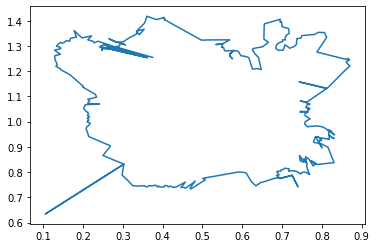

In [164]:
# Other
# Other
raster = rasterio.open(dem_path, 'r')
polys = MultiPolygon(datas)

out_image, transformed = rasterio.mask.mask(raster, datas, nodata=-32767, filled=False,crop=True, invert=False)

# show(out_image)
datas[0]
x,y = datas[0].exterior.xy
plt.plot(x,y)
# print(datas[0])
# raster = rasterio.open(dem_path, 'r')
# image_read = raster.read(1)
# rast = np.ma.masked_array(image_read, mask=(image_read == -32767))
# value = -20
# raster = rast.astype('float32') # You can change the format
# raster_copy = rast.copy()
# raster_copy[raster < value] = np.nan  # Value equal 'nan value'
# raster_copy[raster > value]  = 1
# rast = raster_copy * raster



<AxesSubplot:>

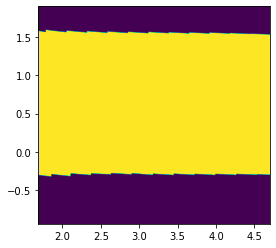

In [10]:
# Plot the Polygons on top of the DEM
ax = gdf[gdf["ids"]==1].plot(facecolor='None', edgecolor='red', linewidth=2)
ax = gdf[gdf["ids"]==6].plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=2)

# Plot DEM
show((dem, 1), ax=ax)

In [38]:
# Read the raster values
array = dem.read(1)
array = np.where(array==-32767, 0, 1)

# Get the affine
affine = dem.transform
affine

Affine(0.001055719298245614, 0.0, 1.6881,
       0.0, -0.0010557419835943327, 1.8955)

In [39]:
# Calculate zonal statistics for Kallio

zs_kallio = zonal_stats(gdf[gdf["ids"]==1], array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for Pihlajamäki
zs_pihla = zonal_stats(gdf[gdf["ids"]==6], array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])


/home/weedsci/miniconda3/envs/semif_gpu/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/home/weedsci/miniconda3/envs/semif_gpu/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [41]:
print(zs_kallio)
print(zs_pihla)

[{'min': None, 'max': None, 'mean': None, 'median': None, 'majority': None}]
[{'min': None, 'max': None, 'mean': None, 'median': None, 'majority': None}]


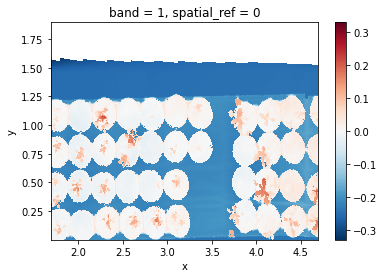

In [5]:
clipped = raster_xarr.rio.clip(polys.geoms)
clipped.plot()

In [70]:
# from geocube.api.core import make_geocube   
# poly_mapped = mapping(datas[3])
# clipped = raster_xarr.rio.clip(polys.geoms, raster_xarr.rio.crs, drop=True, invert=False)
# geoms = [mapping(polys[0])]
# row=next(datas.iterrows())[1]
# coords=np.array(polys.boundary)
# with rasterio.open("raster.tif") as src:
     # out_image, out_transform = mask(src, geoms, crop=True)
# raster_xarr = rio.open_rasterio(dem, mask_and_scale=True, )

# out_image, out_transform=rasterio.mask.mask(raster_xarr, polys, crop=True, nodata=-32767)
# rasterio.mask.mask(raster_xarr, polys, crop=True, nodata=-32767, transform=raster_xarr.rio.crs)


with rasterio.open(dem) as src:
     out_image, out_transform = rasterio.mask.mask(src, polys.geoms, nodata=-32767)
     print(src.transform)
     print(out_transform)

| 0.00, 0.00, 1.69|
| 0.00,-0.00, 1.90|
| 0.00, 0.00, 1.00|
| 0.00, 0.00, 1.69|
| 0.00,-0.00, 1.90|
| 0.00, 0.00, 1.00|


In [71]:
# no data values of the original raster
# plt.imshow(out_image.squeeze())


0.001055719298245614

In [73]:
from rasterstats import zonal_stats
import geopandas as gpd
buf_df = gpd.GeoSeries(polys)
stats = zonal_stats(buf_df, dem, affine=out_transform)

MemoryError: Unable to allocate 59.3 TiB for an array with shape (1, 3943199, 4131782) and data type float32

In [211]:
from rasterstats import zonal_stats
# raster_xarr = rio.open_rasterio(dem, mask_and_scale=True, )
nbr_zonal = zonal_stats(
    vectors=polys,
    raster=clipped[0,:,:].values, # since it's a 3D array
    affine=clipped.rio.transform(),
    stats="max",
)

MemoryError: Unable to allocate 59.3 TiB for an array with shape (3943199, 4131782) and data type float32

In [10]:
# Raster to numpy array
dem = Path("/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-developed-images/MD_2022-08-24/autosfm/dem/dem_clipped.tif")
# batchdir = 
with rasterio.open(dem) as src:
    # Calc NDVI
    red = src.read(1)
    print(red.meta)

print(red.shape)


AttributeError: 'numpy.ndarray' object has no attribute 'meta'

| 0.00, 0.00, 11.65|
| 0.00,-0.00, 10.62|
| 0.00, 0.00, 1.00|
(11.647596033444646, 10.616847552036077)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 72573, 'height': 9440, 'count': 1, 'crs': CRS.from_wkt('LOCAL_CS["Local Coordinates (m)",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.0010302939044982864, 0.0, -10.326512361694807,
       0.0, -0.0010302939044982864, 15.233594538092898), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
| 0.00, 0.00,-10.33|
| 0.00,-0.00, 15.23|
| 0.00, 0.00, 1.00|


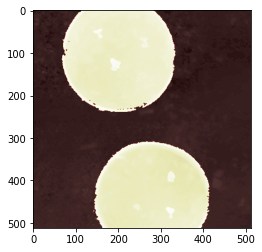

In [132]:

dem = Path("data/semifield-developed-images/NC_2022-08-05/autosfm/dem/dem.tif")

with rasterio.open(dem) as src:

    # The size in pixels of your desired window
    xsize, ysize = 512, 512

    # Generate a window origin (upper left)
    xoff, yoff = 21328, 4481

    # Create a Window and calculate the transform from the source dataset    
    window = Window(xoff,yoff, xsize,ysize)
    transform = src.window_transform(window)
    upper_left = transform * (0,0)
    
    print(transform)
    print(upper_left)
    
    wind_crop = src.read(window=window)
    # Create a new cropped raster to write to
    profile = src.profile
    src_meta = src.meta.copy()
    src_affine = src_meta.get("transform") 
    print(profile)
    print(src_affine)
    
    plt.imshow(src.read(window=window).squeeze(), cmap='pink')
